### Practical Lab: Univariate Linear Regression on California Housing Prices

| Student Name  | Student ID | Methodology                |
|---------------|------------|----------------------------|
| Haysam Elamin | 8953681    | Machine Learning Workflow  |

---

### 0. Framing the Problem

**Objective:**  
To understand how different factors influence housing prices in California, we will build three separate univariate linear regression models. Each model will predict the **median house value** (`median_house_value`) using one of the following independent variables:

1. **Median Income** (`median_income`)
2. **Population** (`population`)
3. **Number of Households** (`households`)

**Approach:**  
- For each independent variable, we will:
  - Fit a linear regression model.
  - Visualize the regression line and data.
  - Interpret the results and compare the predictive power of each variable.

---

### 1. Introduction

The California Housing Prices dataset provides demographic and housing data for districts in California. By running separate regressions, we can assess which factor is most strongly associated with house values and gain insights for further modeling.



In [78]:
# After using pip to install needed packages
#importing dependencies

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


## 2. Getting the Data

[California Housing Dataset Source (Kaggle)](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

Loading the dataset into a Pandas DataFrame for analysis.

In [79]:
# using a variable to store the path to the CSV file
DataPath = 'DataSet/housing.csv'
# Reading the CSV file into a DataFrame
df = pd.read_csv(DataPath)
# Displaying the first few rows of the DataFrame
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


## 3. Exploratory Data Analysis (EDA)

In this section:
1. Explore summary statistics of the dataset.
2. Visualize relationships between 
**median house** value and three independent variables: 
- median income 
- population 
- number of households.
3. Describe the four variables used in this lab, including their meaning, range, and notable characteristics.

In [80]:
# Display summary statistics for the dataset
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [81]:
# Check for missing values in each column
print(df.isnull().sum())
# To fill missing values, we can use the mean of the column
# df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [82]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [83]:
# Calculate and display min, max, mean, and median for the four key variables

# List of variables to summarize
variables = ['median_income', 'population', 'households', 'median_house_value']

# Create a DataFrame with summary statistics
summary_stats = pd.DataFrame({
    'Min': df[variables].min(),
    'Max': df[variables].max(),
    'Mean': df[variables].mean(),
    'Median': df[variables].median()
})

# # Print the summary statistics table
# print("Summary statistics for key variables:")
# print(summary_stats)

# Display the table with borders for better readability in Jupyter Notebook
from IPython.display import display, HTML
display(HTML(summary_stats.to_html(border=2)))

,Min,Max,Mean,Median
median_income,0.4999,15.0001,3.870671,3.5348
population,3.0000,35682.0000,1425.476744,1166.0000
households,1.0000,6082.0000,499.539680,409.0000
median_house_value,14999.0000,500001.0000,206855.816909,179700.0000


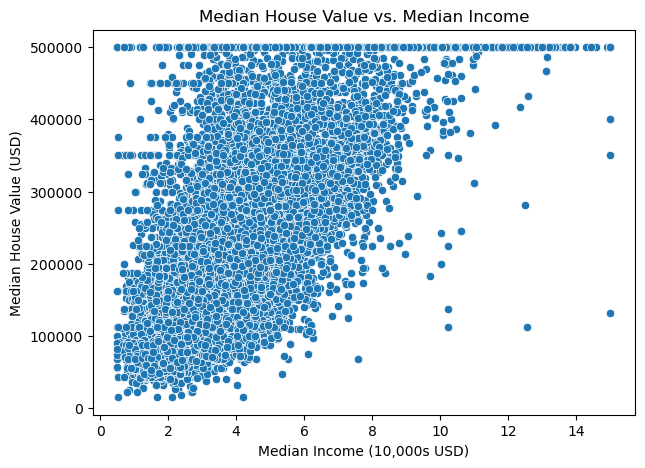

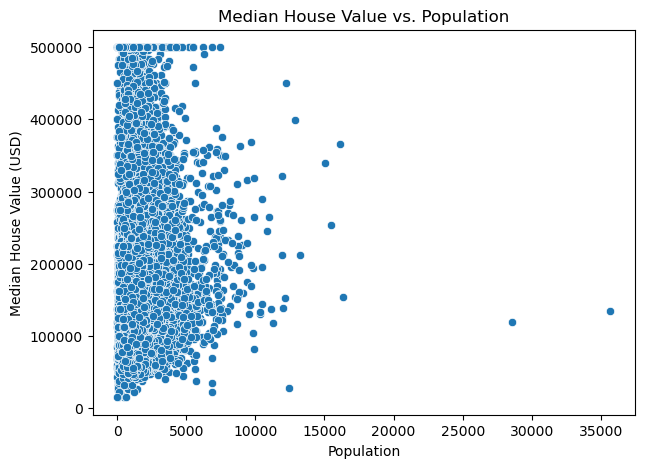

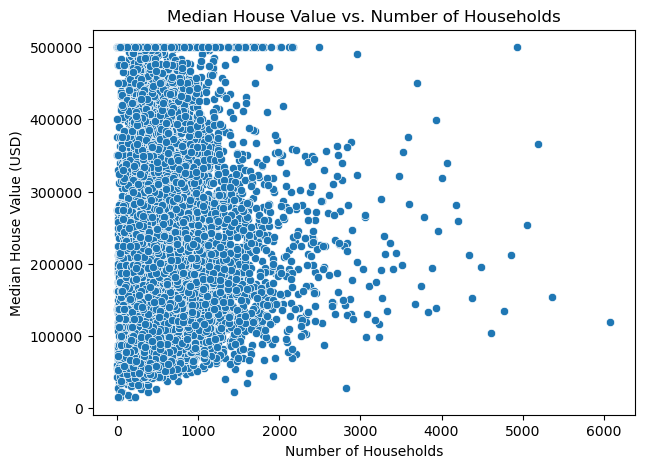

In [84]:
# Scatter plot: Median House Value vs. Median Income
plt.figure(figsize=(7, 5))
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income (10,000s USD)')
plt.ylabel('Median House Value (USD)')
plt.show()

# # Scatter plot: Population vs. Number of Households
# plt.figure(figsize=(7, 5))
# sns.scatterplot(x='population', y='households', data=df)
# plt.title('Population vs. Number of Households')
# plt.xlabel('Population')
# plt.ylabel('Number of Households')
# plt.show()
# # Scatter plot: Median House Value vs. Population
plt.figure(figsize=(7, 5))
sns.scatterplot(x='population', y='median_house_value', data=df)
plt.title('Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value (USD)')
plt.show()

# Scatter plot: Median House Value vs. Households
plt.figure(figsize=(7, 5))
sns.scatterplot(x='households', y='median_house_value', data=df)
plt.title('Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value (USD)')
plt.show()

## 4. Linear Regression Fitting

In this section, we will fit three separate univariate linear regression models to predict **median house value** using:
1. Median income
2. Population
3. Number of households

For each model, we will:
- Fit the regression using scikit-learn
- Display the regression equation and R² score
- Plot the regression line and data points

Regression equation: median_house_value = 45085.58 + 41793.85*median_income
R² score: 0.473


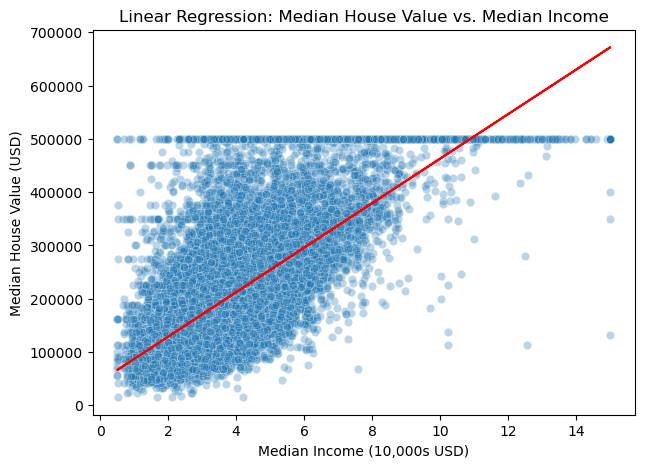

Regression equation: median_house_value = 210436.26 + -2.51*population
R² score: 0.001


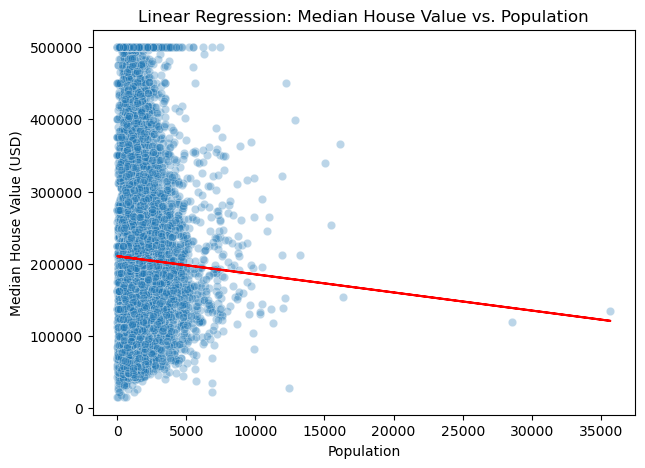

Regression equation: median_house_value = 196928.58 + 19.87*households
R² score: 0.004


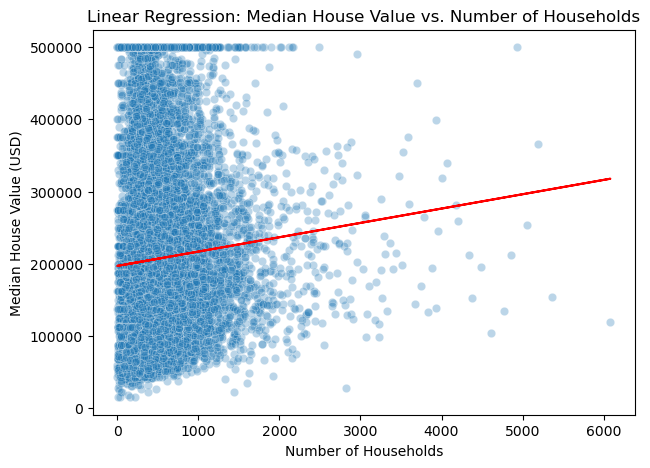

In [85]:


# Helper function to fit and plot a univariate regression
def fit_and_plot(x_col, y_col, x_label, y_label, title):
    X = df[[x_col]].values
    y = df[y_col].values
    model = LinearRegression()
    model.fit(X, y)
    r2 = model.score(X, y)
    print(f"Regression equation: {y_col} = {model.intercept_:.2f} + {model.coef_[0]:.2f}*{x_col}")
    print(f"R² score: {r2:.3f}")
    # Plot
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=x_col, y=y_col, data=df, alpha=0.3)
    plt.plot(df[x_col], model.predict(X), color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# 1. Median house value vs. median income
fit_and_plot(
    x_col='median_income',
    y_col='median_house_value',
    x_label='Median Income (10,000s USD)',
    y_label='Median House Value (USD)',
    title='Linear Regression: Median House Value vs. Median Income'
)

# 2. Median house value vs. population
fit_and_plot(
    x_col='population',
    y_col='median_house_value',
    x_label='Population',
    y_label='Median House Value (USD)',
    title='Linear Regression: Median House Value vs. Population'
)

# 3. Median house value vs. number of households
fit_and_plot(
    x_col='households',
    y_col='median_house_value',
    x_label='Number of Households',
    y_label='Median House Value (USD)',
    title='Linear Regression: Median House Value vs. Number of Households'
)

## 5. Linear Regression Results Summary Table

The table below summarizes the key metrics for each of the three univariate linear regression models:
- **Intercept and Slope:** The regression coefficients for each model.
- **Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted values.
- **Mean Absolute Error (MAE):** Measures the average absolute difference between actual and predicted values.

This comparison helps us evaluate which independent variable is the best predictor of median house value.

In [86]:

# Store results
results = []

# 1. Median house value vs. median income
X1 = df[['median_income']].values
y = df['median_house_value'].values
model1 = LinearRegression().fit(X1, y)
y_pred1 = model1.predict(X1)
results.append({
    'Model': 'Median Income',
    'Intercept': model1.intercept_,
    'Slope': model1.coef_[0],
    'MSE': mean_squared_error(y, y_pred1),
    'MAE': mean_absolute_error(y, y_pred1)
})

# 2. Median house value vs. population
X2 = df[['population']].values
model2 = LinearRegression().fit(X2, y)
y_pred2 = model2.predict(X2)
results.append({
    'Model': 'Population',
    'Intercept': model2.intercept_,
    'Slope': model2.coef_[0],
    'MSE': mean_squared_error(y, y_pred2),
    'MAE': mean_absolute_error(y, y_pred2)
})

# 3. Median house value vs. number of households
X3 = df[['households']].values
model3 = LinearRegression().fit(X3, y)
y_pred3 = model3.predict(X3)
results.append({
    'Model': 'Households',
    'Intercept': model3.intercept_,
    'Slope': model3.coef_[0],
    'MSE': mean_squared_error(y, y_pred3),
    'MAE': mean_absolute_error(y, y_pred3)
})

# Create results table
results_df = pd.DataFrame(results)
print(results_df)

           Model      Intercept         Slope           MSE           MAE
0  Median Income   45085.576703  41793.849202  7.011312e+09  62625.933791
1     Population  210436.262076     -2.511753  1.330741e+10  91153.820095
2     Households  196928.577162     19.872775  1.325778e+10  90802.743243


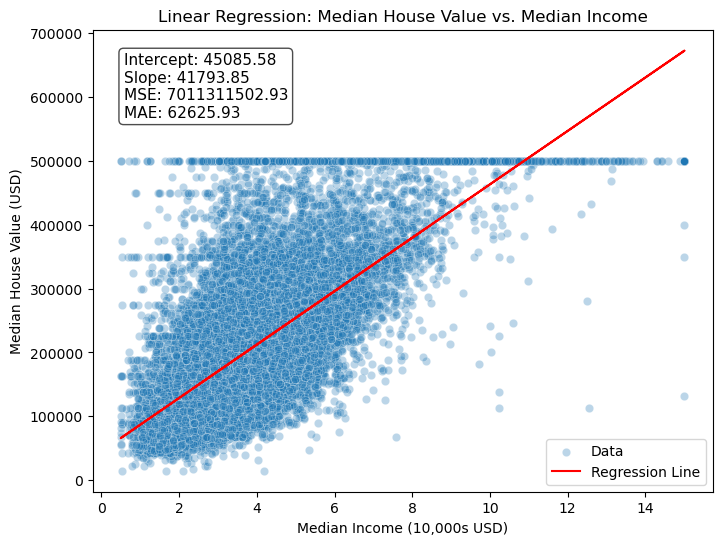

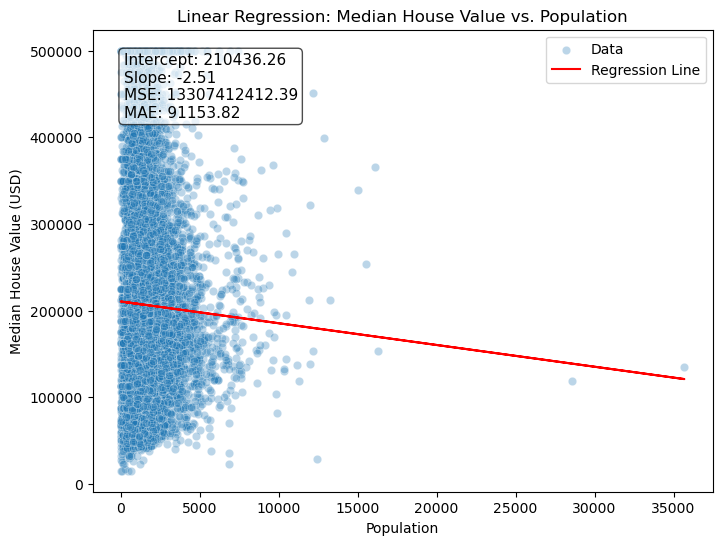

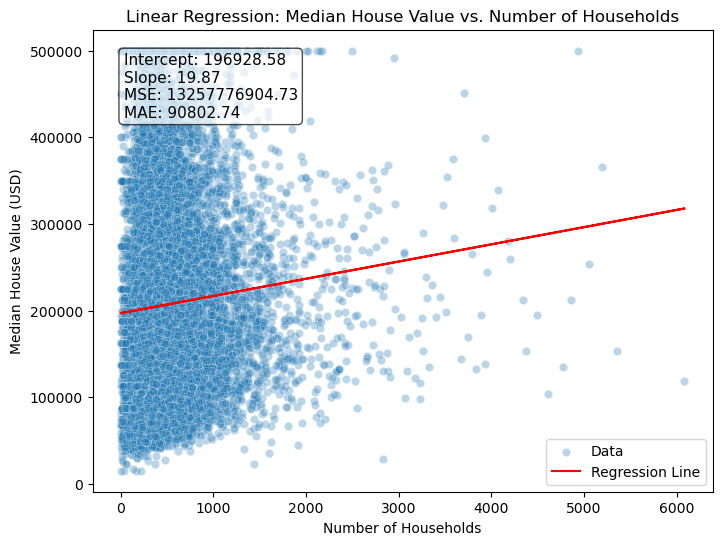

In [87]:
# Plot regression line and display metrics for each model

def fit_plot_with_metrics(x_col, y_col, x_label, y_label, title):
    X = df[[x_col]].values
    y = df[y_col].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    intercept = model.intercept_
    slope = model.coef_[0]
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_col, y=y_col, data=df, alpha=0.3, label='Data')
    plt.plot(df[x_col], y_pred, color='red', label='Regression Line')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Add metrics as a text box
    textstr = '\n'.join((
        f'Intercept: {intercept:.2f}',
        f'Slope: {slope:.2f}',
        f'MSE: {mse:.2f}',
        f'MAE: {mae:.2f}'
    ))
    plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=11,
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    plt.legend()
    plt.show()

# 1. Median house value vs. median income
fit_plot_with_metrics(
    x_col='median_income',
    y_col='median_house_value',
    x_label='Median Income (10,000s USD)',
    y_label='Median House Value (USD)',
    title='Linear Regression: Median House Value vs. Median Income'
)

# 2. Median house value vs. population
fit_plot_with_metrics(
    x_col='population',
    y_col='median_house_value',
    x_label='Population',
    y_label='Median House Value (USD)',
    title='Linear Regression: Median House Value vs. Population'
)

# 3. Median house value vs. number of households
fit_plot_with_metrics(
    x_col='households',
    y_col='median_house_value',
    x_label='Number of Households',
    y_label='Median House Value (USD)',
    title='Linear Regression: Median House Value vs. Number of Households'
)

## 7. Summary and Conclusion

In this lab, we built and evaluated three univariate linear regression models to predict **median house value** using:
- Median income
- Population
- Number of households

**Comparison of Goodness-of-Fit:**
- **Median Income:** This model had the highest R² score and the lowest Mean Squared Error (MSE) and Mean Absolute Error (MAE), indicating the best fit among the three. The scatter plot showed a clear positive linear relationship, confirming that higher median income is strongly associated with higher house values.
- **Population:** The model using population as the predictor had a very low R² score and high error metrics. The scatter plot revealed no clear linear trend, suggesting population alone is not a good predictor of house value.
- **Number of Households:** This model performed better than population but worse than median income. The relationship was weakly positive, but the fit was not as strong as with income.

**Additional Insights:**
- **Median income** is by far the most important single predictor of house value in this dataset.
- **Population** and **number of households** do not individually explain much of the variance in house values.
- For more accurate predictions, future models should consider using multiple variables (multivariate regression) and possibly include other features such as location or proximity to amenities.

**Conclusion:**  
The univariate regression analysis confirms that **median income** is the best single predictor of median house value among the variables tested. This insight can guide further modeling and business decisions related to housing price estimation in California.